In [98]:
# spotify python api imports
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# accessing spotify application through credentials
cid = '5b85a9af539f47da8dcbbcf517e42650'
secret = 'cb3ce73abd464866b285015d631ca1d5'
clientCredentialsManager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = clientCredentialsManager)

In [99]:
valenceForEmotion = {} # for lasya

# method to access playlist and obtain song data
def accessPlaylist(url, limit, offset):
    # create an empty list and an empty df
    listOfFeatures = ['artist', 'album', 'trackName', 'trackId', 'danceability', 'energy', 'loudness',
                              'valence', 'tempo', 'acousticness']
    playlistDf = pd.DataFrame(columns = listOfFeatures)
    playlist = sp.user_playlist_tracks('', url, limit=limit, offset=offset)["items"]

    # loop through the given playlist and get song features
    for track in playlist:
        # create empty dict
        playlistFeatures = {}
        # get song data
        playlistFeatures['artist'] = track['track']['album']['artists'][0]['name']
        playlistFeatures['album'] = track['track']['album']['name']
        playlistFeatures["trackName"] = track["track"]["name"]
        playlistFeatures["trackId"] = track["track"]["id"]
        playlistFeatures["popularity"] = track["track"]["popularity"]
        playlistFeatures["albumReleaseDate"] = track["track"]["album"]["release_date"]
        audioFeatures = sp.audio_features(playlistFeatures["trackId"])[0]
        
        # get song features
        for feature in listOfFeatures[4:]:
            playlistFeatures[feature] = audioFeatures[feature]
            # DO NOT DELETE - LASYA NEEDS FOR VALENCE ANALYSIS 
            if (feature == "valence"):
                valenceForEmotion[playlistFeatures['trackName']] = audioFeatures["valence"]
        
        trackDf = pd.DataFrame(playlistFeatures, index = [0])
        playlistDf = pd.concat([playlistDf, trackDf], ignore_index = True)
    # TEST --> print(playlistDf.valence[2])
    return playlistDf

In [100]:
# send any public playlist to method
# 'https://open.spotify.com/playlist/2U9q9cml8EInaiYFDYwZ73?si=1f188bb952c041c1'
result = str(input("Please enter your Spotify playlist URL: "))
try:
    songs = accessPlaylist(result, 100, 0)
except:
    songs = accessPlaylist('https://open.spotify.com/playlist/2U9q9cml8EInaiYFDYwZ73?si=1f188bb952c041c1', 100, 0)
    print("Your entered playlist URL could not be found. We have provided our own playlist for you to explore instead.")

Please enter your Spotify playlist URL: https://open.spotify.com/playlist/5IRNgvoeu2WLmVn5nVppFQ?si=bc4c13ea385f4e12


In [101]:
# put song data into table
playlistTable = pd.concat([songs], ignore_index = True)

In [102]:
# determine number of songs in the playlist to display the correct number in the table
numberOfSongs = 1
#for trackName in songs:
for index, row in songs.iterrows():
    numberOfSongs += 1
playlistTable.head(numberOfSongs)

,artist,album,trackName,trackId,danceability,energy,loudness,valence,tempo,acousticness,popularity,albumReleaseDate
0,Odd Future,The OF Tape Vol. 2,Oldie,53dkS3h9uTNsWYZTPacnpx,0.839,0.583,-5.941,0.564,87.990,0.239000,65.0,2012-03-16
1,Earl Sweatshirt,"I Don't Like Shit, I Don't Go Outside: An Albu...",Huey,3iut542DAj1c44VzyA6CpN,0.423,0.590,-7.370,0.387,76.035,0.550000,55.0,2015-03-23
2,Earl Sweatshirt,"I Don't Like Shit, I Don't Go Outside: An Albu...",Grief,47A4a2ZxJaZz5nBME2HtXs,0.645,0.589,-6.171,0.616,89.971,0.479000,51.0,2015-03-23
3,Earl Sweatshirt,Doris,Hive (feat. Vince Staples & Casey Veggies),6JKoTnberZoBgUuxa6l4Kh,0.619,0.742,-6.995,0.782,144.602,0.204000,60.0,2013-08-16
4,"Tyler, The Creator",Goblin,She,4y4KG66qCAN2TTevOAEjHy,0.351,0.622,-6.495,0.457,83.375,0.256000,0.0,2011-05-09
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Earl Sweatshirt,Doris,Centurion (feat. Vince Staples),6mrRJpEOqNEKygu4fesH1e,0.348,0.796,-8.266,0.573,166.224,0.065500,47.0,2013-08-16
96,Earl Sweatshirt,Doris,Pre (feat. SK La' Flare),4B31QOL13iBeuIsaGD20BS,0.668,0.577,-6.984,0.557,99.957,0.149000,49.0,2013-08-16
97,Jay Rock,Follow Me Home,No Joke (feat. Ab Soul),5zIk4pDMxSh7yKotDgFwTK,0.537,0.863,-4.013,0.683,78.774,0.638000,37.0,2011-07-26
98,Yung Gravy,Mr. Clean - EP,Mr. Clean,4hiNSVDrVkcrd0BrOME3HX,0.717,0.760,-4.892,0.669,106.320,0.786000,0.0,2016-09-08


Emotions associated with your music are average, slightly on the sadder side.
Your average valance is 0.4683909999999998


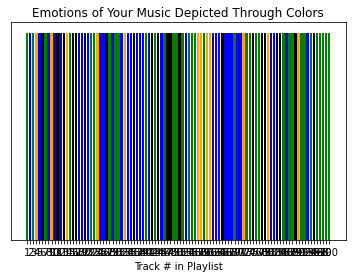

In [103]:
# imports for graphing and spotify api
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np
import spotipy as sp
from termcolor import colored

totalValence = 0.0
count = 0
songsForEmotion = []
graphHeight = []
colorsForEmotion = []

# looping through valence values
for key, value in valenceForEmotion.items():
    totalValence += value
    count += 1
    songsForEmotion.append(count) 
    graphHeight.append(1) # every bar will have same height
    # print("The valence of " + key + " is " + str(value))
    
    # adjusting the color of the bar based on the song's happiness
    if (value < 0.3):
        colorsForEmotion.append("black")
    elif (value < 0.5):
        colorsForEmotion.append("blue")
    elif (value < 0.7):
        colorsForEmotion.append("green")
    else:
        colorsForEmotion.append("orange")

avgValence = totalValence / count

# printing output to the user
if (avgValence < 0.3):
    print(colored("Emotions associated with your music are very sad and gloomy.", 'blue'))
    print("Your average valence is " + str(avgValence))
elif (avgValence < 0.5):
    print(colored("Emotions associated with your music are average, slightly on the sadder side.", 'blue'))
    print("Your average valance is " + str(avgValence))
elif (avgValence < 0.7):
    print(colored("Emotions associated with your music are average, slightly on the happier side.", 'green'))
    print("Your average valance is " + str(avgValence))
else:
    print(colored("Emotions associated with your music are very happy and hype.", 'orange'))
    print("Your average valance is " + str(avgValence))
    
# putting data into the graph and displaying it
plt.bar(songsForEmotion, graphHeight, color=colorsForEmotion)
plt.title('Emotions of Your Music Depicted Through Colors')
plt.xlabel('Track # in Playlist')
plt.yticks([])
plt.xticks(np.arange(1, count + 1, 1))
plt.show()

In [104]:
# imports for graphs
import numpy as np
import matplotlib.pyplot as plt

# declaring a method to graph a comparison between two songs
def audioAnalysisGrapher(name1, name2, decision):
    index1 = int(0)
    index2 = int(1)
    count = 0
    one = False
    two = False
    # determining what index the song name correlates to
    if decision == "name":
        for index, row in songs.iterrows():
            nameTest = str(row['trackName'])
            nameTester = nameTest.upper()
            if name1 == nameTester:
                index1 = count
                one = True
            if name2 == nameTester:
                index2 = count
                two = True
            if name1 in nameTester:
                index1 = count
                name1 = nameTest
                one = True
            if name2 in nameTester:
                index2 = count
                name2 = nameTest
                two = True
            count += 1
    else:
        numberOne = int(name1)
        numberTwo = int(name2)
        for index, row in songs.iterrows():
            count += 1
            nameTest = str(row['trackName'])
            if numberOne == count:
                index1 = count
                name1 = nameTest
                one = True
            elif numberTwo == count:
                index2 = count
                name2 = nameTest
                two = True
    
    if (one == False):
        print("")
        print("The first song " + decision + " entered does not exist within the playlist")
    elif (two == False):
        print("")
        print("The second song " + decision + " entered does not exist within the playlist")
    
    if (one == True and two == True):
        # obtaining song features
        firstAverages = (songs.valence[index1]*100, songs.danceability[index1]*100, songs.energy[index1]*100, songs.tempo[index1])
        secondAverages = (songs.valence[index2]*100, songs.danceability[index2]*100, songs.energy[index2]*100, songs.tempo[index2])

        # creating plot
        fig, ax = plt.subplots()
        index = np.arange(4)
        barWidth = 0.2
        opacity1 = 0.8
        opacity2 = 0.8
    
        # changing the color of the bar based on the song's valence
        color1 = 'gray'
        if (songs.valence[index1] < 0.3):
            color1 = 'black'
        elif (songs.valence[index1] < 0.5):
            color1 = 'blue'
        elif (songs.valence[index1] < 0.7):
            color1 = 'green'
        else:
            color1 = 'orange'
       
        # changing the color of the bar based on the song's valence
        color2 = 'white'
        if (songs.valence[index2] < 0.3):
            color2 = 'black'
        elif (songs.valence[index2] < 0.5):
            color2 = 'blue'
        elif (songs.valence[index2] < 0.7):
            color2 = 'green'
        else:
            color2 = 'orange'
    
        # adjusting opacity if both songs represent the same color correlating to valence
        if (color1 == color2):
            opacity1 = 0.9
            opacity2 = 0.5
    
        bars1 = plt.bar(index, firstAverages, barWidth,
        alpha=opacity1,
        color=color1,
        label=name1)
    
        bars2 = plt.bar(index + barWidth, secondAverages, barWidth,
        alpha=opacity2,
        color=color2,
        label=name2)

        plt.xlabel('')
        plt.ylabel('Mean Values')
        plt.title('Audio Analysis Comparison')
        plt.xticks(index + barWidth, ('Valence (x100)', 'Danceability (x100)', 'Energy (x100)', 'Tempo'))
        plt.legend()

        plt.tight_layout()
        plt.show()

Would you like to enter track names or track numbers? 3005

We could not recognize your input. Please retry. Would you like to enter track names or track numbers? name
What is the name of the first track you would like to analyze? 3005
What is the name of the track you would like to compare it to? fear


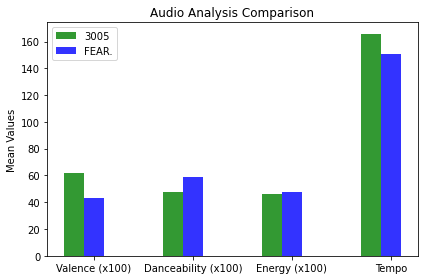

In [105]:
input1 = ""
input2 = ""
decision = str(input("Would you like to enter track names or track numbers? "))
decision = decision.lower()
tester = False
while tester == False:
    if "name" in decision:
        decision = "name"
        tester = True
    elif "num" in decision:
        decision = "number"
        tester = True
    else:
        print("")
        decision = str(input("We could not recognize your input. Please retry. Would you like to enter track names or track numbers? "))
        decision = decision.lower()
while input1 == input2:
    input1 = str(input('What is the ' + decision + ' of the first track you would like to analyze? '))
    input2 = str(input('What is the ' + decision + ' of the track you would like to compare it to? '))
    if (input1 == input2):
        print("")
        print("Please enter two different song " + decision + "s")
input1 = input1.upper()
input2 = input2.upper()
audioAnalysisGrapher(input1, input2, decision)

In [106]:
'''
import chartify
import numpy as np
import matplotlib.pyplot as plt

data = playlist_5b85a9af539f47da8dcbbcf517e42650()

# Manipulate the data
energy_and_danceability_by_track = (
    data.groupby('track')[['energy', 'danceability']].sum()
    .reset_index())
print(energy_and_danceability_by_track.head())
    
# Plot the data
ch = chartify.Chart(blank_labels=True)
ch.plot.scatter(
    data_frame=energy_and_danceability_by_track,
    x_column='energy',
    y_column='danceability',
    color_column='track')
ch.style.color_palette.reset_palette_order()
ch.plot.text(
    data_frame=price_and_quantity_by_country,
    x_column='energy',
    y_column='danceability',
    text_column='track',
    color_column='track',
    x_offset=1,
    y_offset=-1,
    font_size='10pt')
ch.set_title("Energy and Danceability Correlation")
ch.set_subtitle("Labels for specific observations.")
ch.show('png')
'''

'\nimport chartify\nimport numpy as np\nimport matplotlib.pyplot as plt\n\ndata = playlist_5b85a9af539f47da8dcbbcf517e42650()\n\n# Manipulate the data\nenergy_and_danceability_by_track = (\n    data.groupby(\'track\')[[\'energy\', \'danceability\']].sum()\n    .reset_index())\nprint(energy_and_danceability_by_track.head())\n    \n# Plot the data\nch = chartify.Chart(blank_labels=True)\nch.plot.scatter(\n    data_frame=energy_and_danceability_by_track,\n    x_column=\'energy\',\n    y_column=\'danceability\',\n    color_column=\'track\')\nch.style.color_palette.reset_palette_order()\nch.plot.text(\n    data_frame=price_and_quantity_by_country,\n    x_column=\'energy\',\n    y_column=\'danceability\',\n    text_column=\'track\',\n    color_column=\'track\',\n    x_offset=1,\n    y_offset=-1,\n    font_size=\'10pt\')\nch.set_title("Energy and Danceability Correlation")\nch.set_subtitle("Labels for specific observations.")\nch.show(\'png\')\n'